In [2]:
import pandas as pd
import prepare_dataset

import warnings
warnings.filterwarnings("ignore")


Configuration loaded successfully.
Starting data injection process...
Fetching news for AAPL
AAPL → 238 articles fetched
Fetching news for ADAP
ADAP → 120 articles fetched
Fetching news for AGCO
AGCO → 196 articles fetched
Fetching news for BA
BA → 227 articles fetched
Fetching news for BG
BG → 192 articles fetched
Fetching news for CALM
CALM → 185 articles fetched
Fetching news for CAT
CAT → 221 articles fetched
Fetching news for CSCO
CSCO → 222 articles fetched
Fetching news for CVX
CVX → 235 articles fetched
Fetching news for DDOG
DDOG → 225 articles fetched
Fetching news for DE
DE → 205 articles fetched
Fetching news for GRWG
GRWG → 127 articles fetched
Fetching news for HUM
HUM → 189 articles fetched
Fetching news for IBKR
IBKR → 214 articles fetched
Fetching news for IEX
IEX → 177 articles fetched
Fetching news for JPM
JPM → 237 articles fetched
Fetching news for KO
KO → 232 articles fetched
Fetching news for LMT
LMT → 240 articles fetched
Fetching news for MS
MS → 230 articles f

In [3]:
df= prepare_dataset.clean_merge_df

In [4]:
df_vis= df.copy()

In [5]:
df_vis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5100 entries, 0 to 5099
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      5100 non-null   object 
 1   ticker    5100 non-null   object 
 2   open      5100 non-null   float64
 3   high      5100 non-null   float64
 4   low       5100 non-null   float64
 5   close     5100 non-null   float64
 6   adjusted  5100 non-null   float64
 7   returns   5100 non-null   float64
 8   volume    5100 non-null   int64  
 9   quantity  5100 non-null   int64  
 10  sector    5100 non-null   object 
 11  weight    5100 non-null   float64
 12  headline  5100 non-null   object 
 13  summary   5100 non-null   object 
 14  source    5100 non-null   object 
dtypes: float64(7), int64(2), object(6)
memory usage: 597.8+ KB


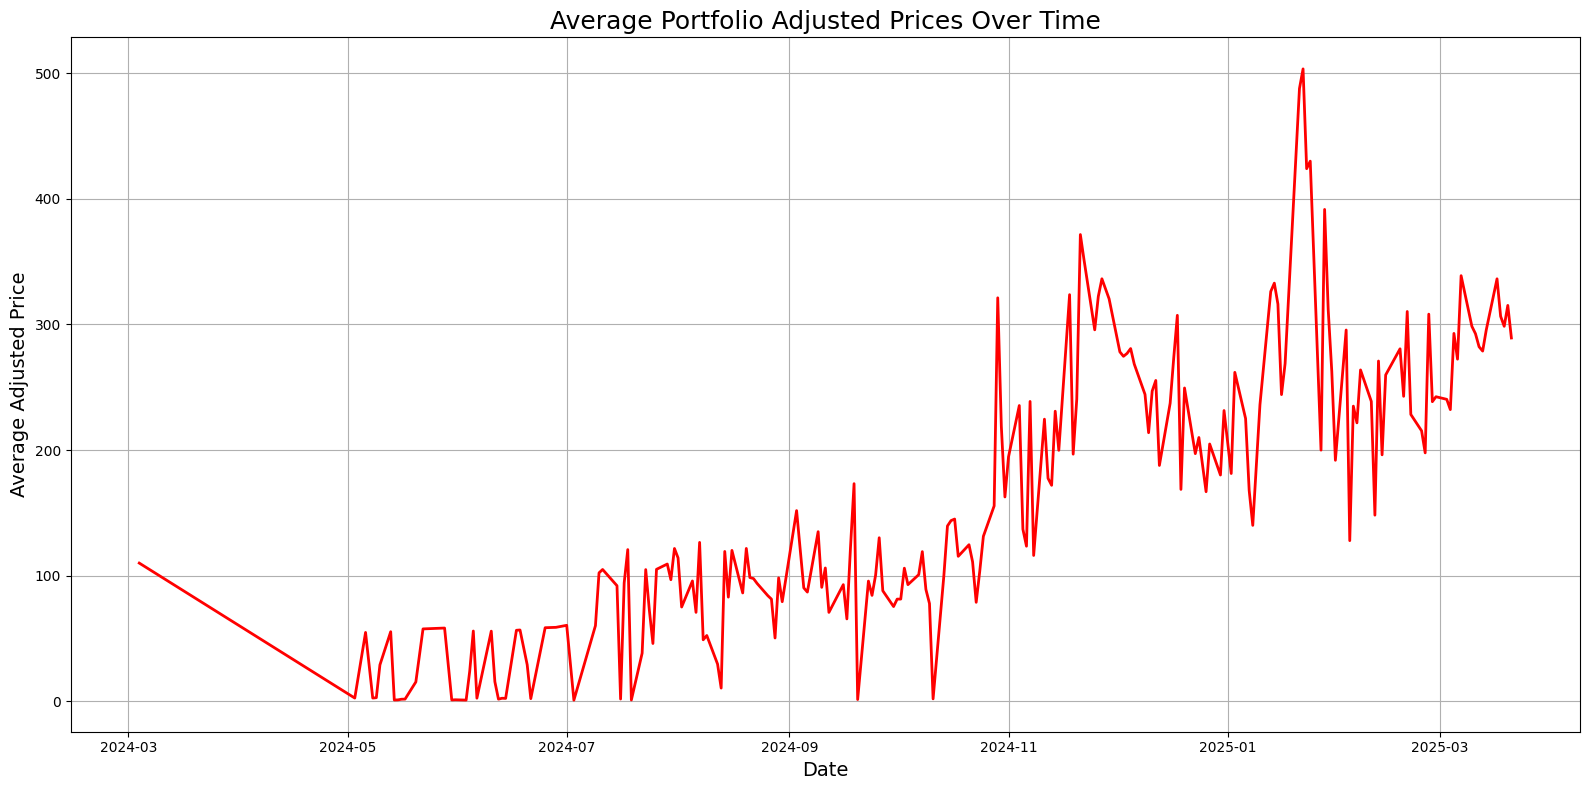

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'date' column is datetime
df_vis["date"] = pd.to_datetime(df_vis["date"])

# Group by date and compute average adjusted price
avg_prices = df_vis.groupby("date")["adjusted"].mean().reset_index()

# Create the plot
plt.figure(figsize=(16, 8))
plt.plot(avg_prices["date"], avg_prices["adjusted"], color='red', linewidth=2)

# Customize the plot
plt.title("Average Portfolio Adjusted Prices Over Time", fontsize=18)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Average Adjusted Price", fontsize=14)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


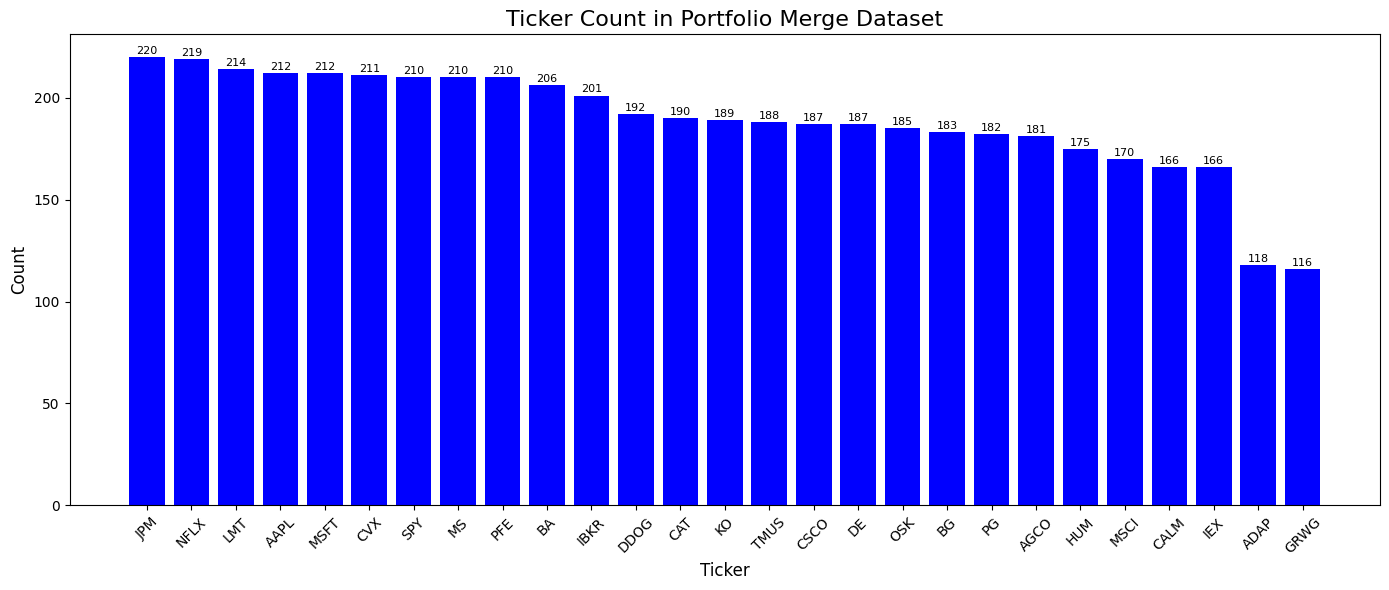

In [7]:
import matplotlib.pyplot as plt

# Count the frequency of each ticker
ticker_count = df_vis['ticker'].value_counts().reset_index()
ticker_count.columns = ['ticker', 'count']

# Create the bar plot
plt.figure(figsize=(14, 6))
bars = plt.bar(ticker_count['ticker'], ticker_count['count'], color='blue')

# Add titles and labels
plt.title("Ticker Count in Portfolio Merge Dataset", fontsize=16)
plt.xlabel("Ticker", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Add integer count labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f"{int(height)}",
             ha='center', va='bottom', fontsize=8)

plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


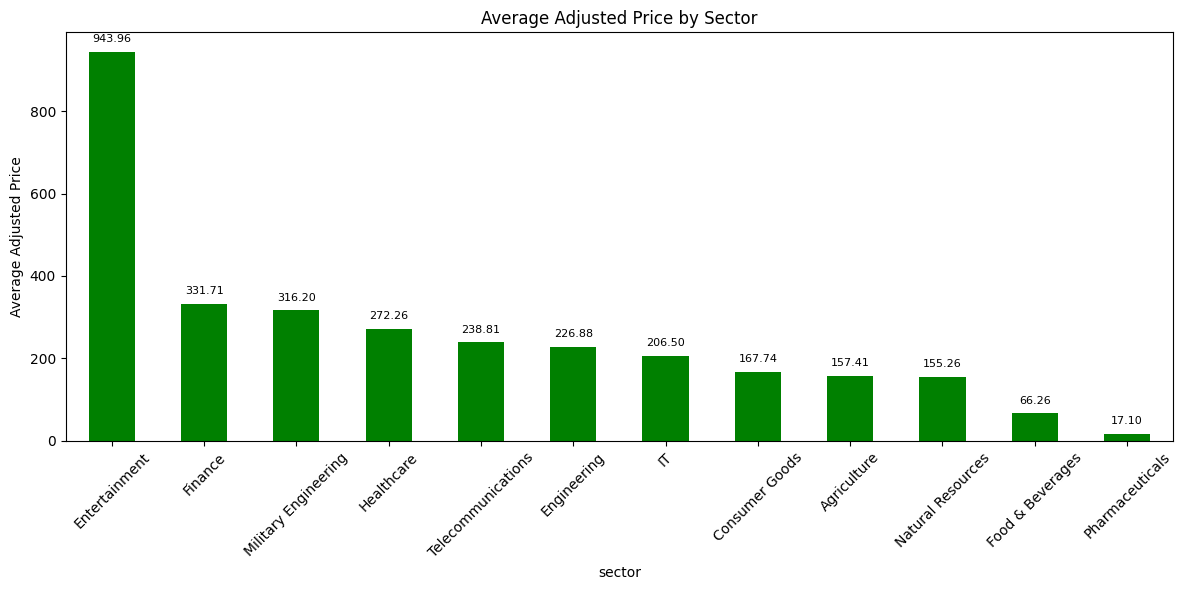

In [8]:
avg_sec_price =df_vis.groupby('sector')['adjusted'].mean().sort_values(ascending=False)
avg_sec_price.plot(kind='bar', figsize=(12, 6), color='green')
plt.title("Average Adjusted Price by Sector")
plt.ylabel("Average Adjusted Price")

# Add count labels on top of bars with 2 decimal places
for i, count in enumerate(avg_sec_price):
    plt.text(i, count + 0.02 * max(avg_sec_price), f"{count:.2f}", ha='center', va='bottom', fontsize=8)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


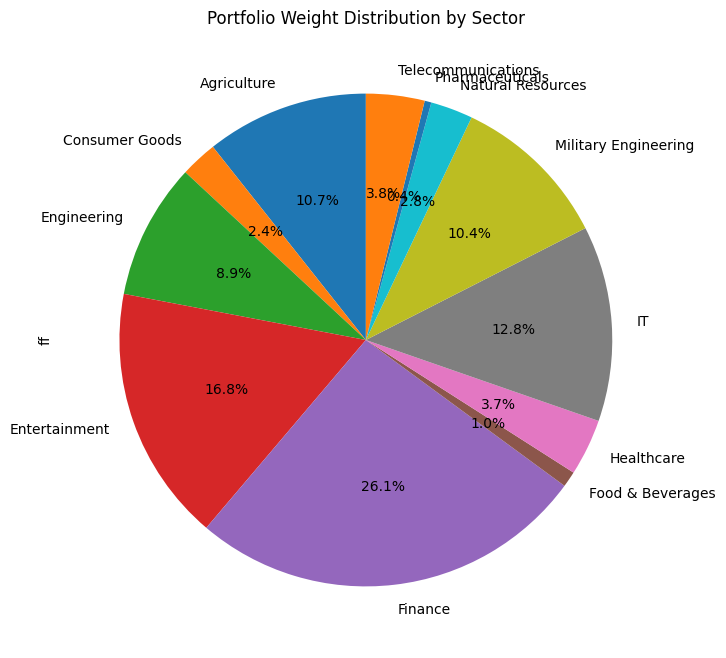

In [9]:

df_vis.groupby("sector")["weight"].sum().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90)
plt.title("Portfolio Weight Distribution by Sector")
plt.ylabel("ff")  
plt.show()


In [10]:
from wordcloud import WordCloud 
def plot_ticker_and_news_visualization(df):
    df['ticker']= df['ticker'].astype(str)
    df['headline']= df['headline'].astype(str)
    df['summary'] =df['summary'].astype(str)

    # Word Cloud of Ticker Mentions
    ticker_text = ' '.join(df['ticker'])
    ticker_wordcloud = WordCloud(background_color='white', width=800, height=400).generate(ticker_text)

    plt.figure(figsize=(12, 8))
    plt.imshow(ticker_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud of Ticker Mentions in Headline")
    plt.show()


    # Word Cloud of All Tweets
    all_headline_text = ' '.join(df['headline'])
    headline_wordcloud = WordCloud(background_color='white', width=800, height=400, max_words=200, colormap='viridis').generate(all_headline_text)

    plt.figure(figsize=(12, 8))
    plt.imshow(headline_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud of All Headline")
    plt.show()

    # Word Cloud of All Tweets
    all_summary_text = ' '.join(df['headline'])
    summary_wordcloud = WordCloud(background_color='white', width=800, height=400, max_words=200, colormap='viridis').generate(all_summary_text)

    plt.figure(figsize=(12, 8))
    plt.imshow(summary_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud of All Summary")
    plt.show()
    #Bar Plot: Total Word Count of Headline Per Ticker
    df['word_count'] = df['headline'].apply(lambda x: len(x.split()))
    total_word_count_per_ticker = df.groupby('ticker')['word_count'].sum().sort_values(ascending=False)

    plt.figure(figsize=(14, 8))
    plt.bar(total_word_count_per_ticker.index, total_word_count_per_ticker, color='skyblue')
    plt.title('Total Word Count of Headline per Ticker')
    # Add count labels on top of bars
    for i, count in enumerate(total_word_count_per_ticker):
        plt.text(i, count + 0.02 * max(total_word_count_per_ticker), str(count), ha='center', va='bottom', fontsize=8)

    plt.xticks(rotation=45)
    plt.xlabel('Ticker')
    plt.ylabel('Total Word Count')

     #Bar Plot: Total Word Count of Summary Per Ticker
    df['word_count'] = df['summary'].apply(lambda x: len(x.split()))
    total_word_count_per_ticker = df.groupby('ticker')['word_count'].sum().sort_values(ascending=False)

    plt.figure(figsize=(14, 8))
    plt.bar(total_word_count_per_ticker.index, total_word_count_per_ticker, color='skyblue')
    plt.title('Total Word Count of summary per Ticker')

    # Add count labels on top of bars
    for i, count in enumerate(total_word_count_per_ticker):
        plt.text(i, count + 0.02 * max(total_word_count_per_ticker), str(count), ha='center', va='bottom', fontsize=8)

    plt.xticks(rotation=45)
    plt.xlabel('Ticker')
    plt.ylabel('Total Word Count')

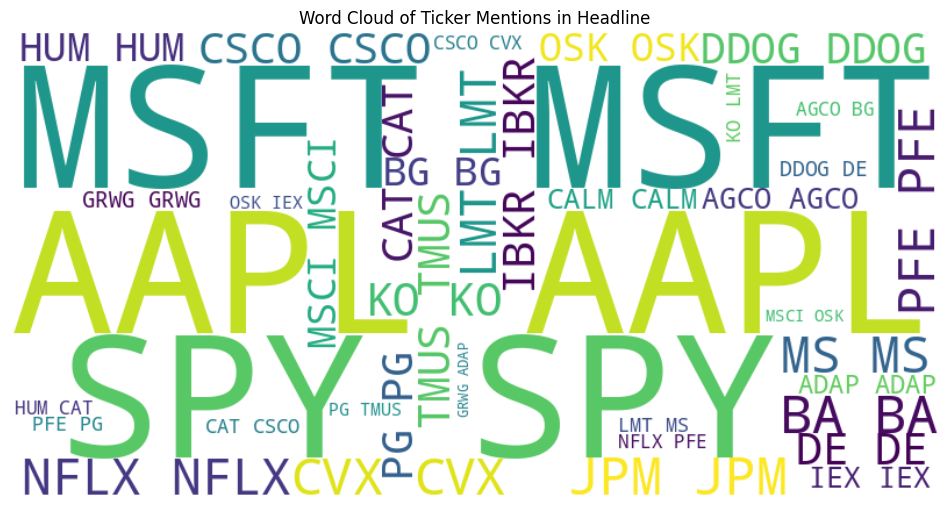

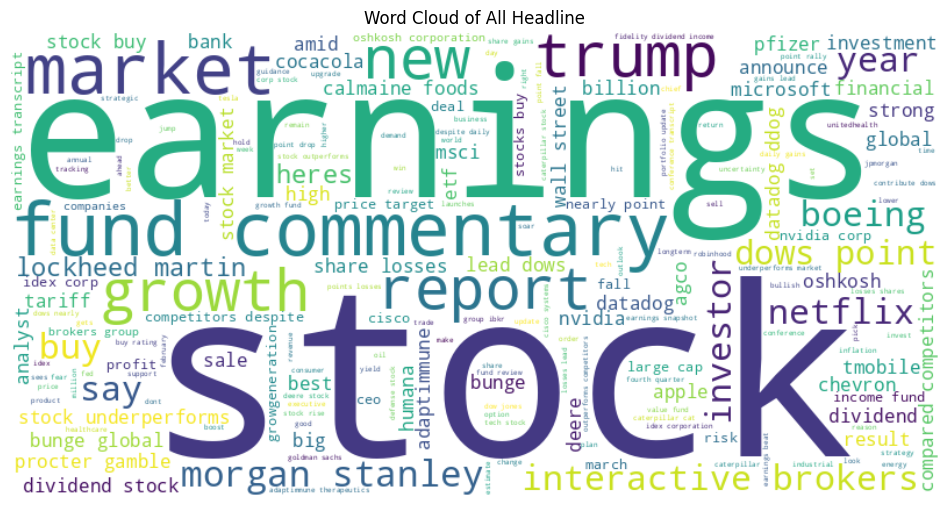

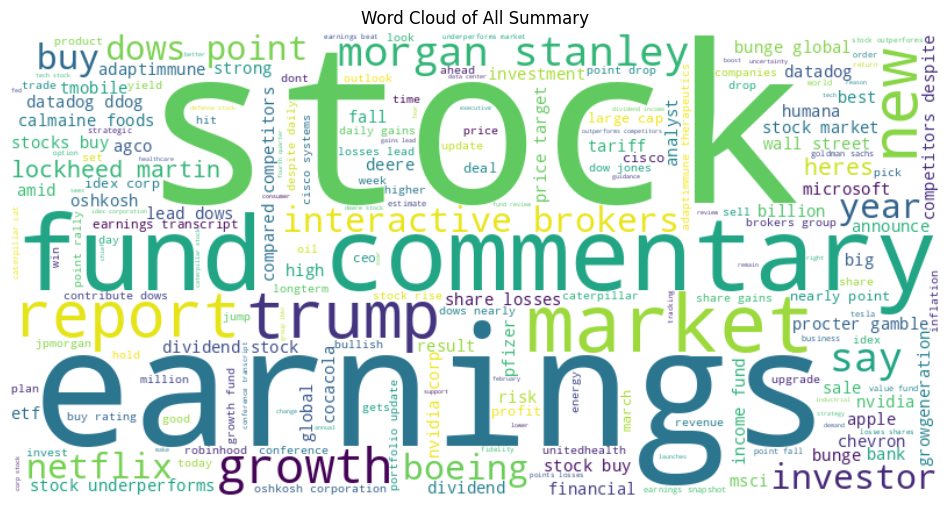

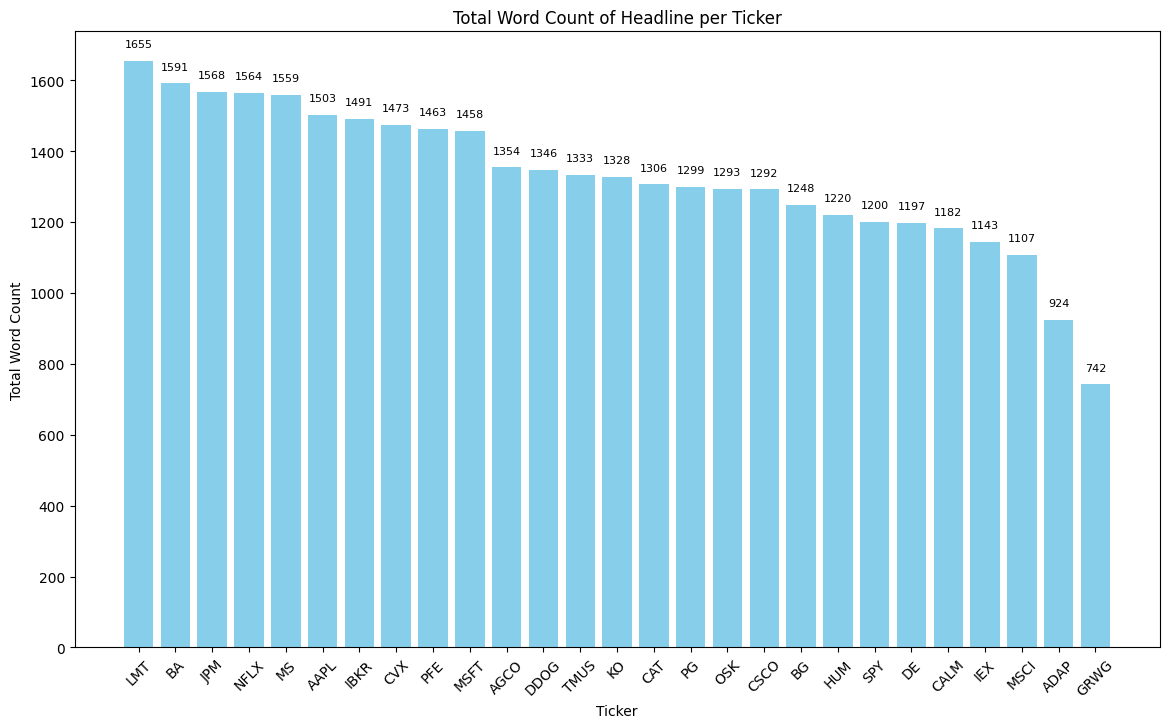

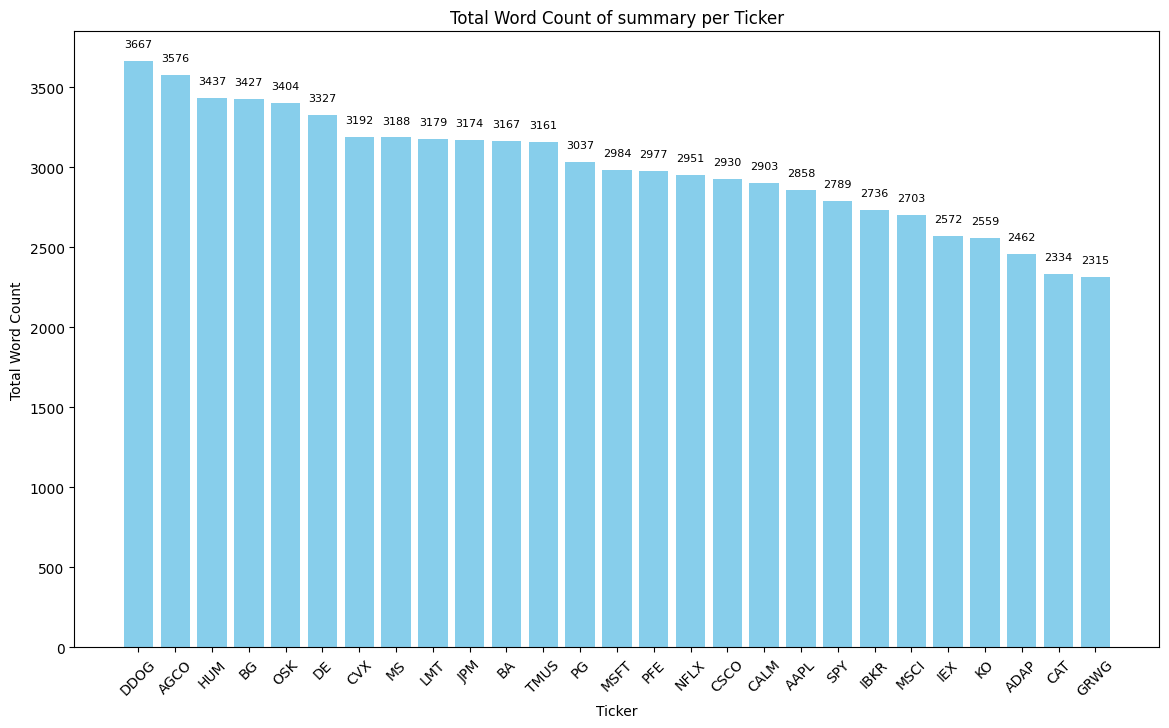

In [11]:
plot_ticker_and_news_visualization(df_vis)

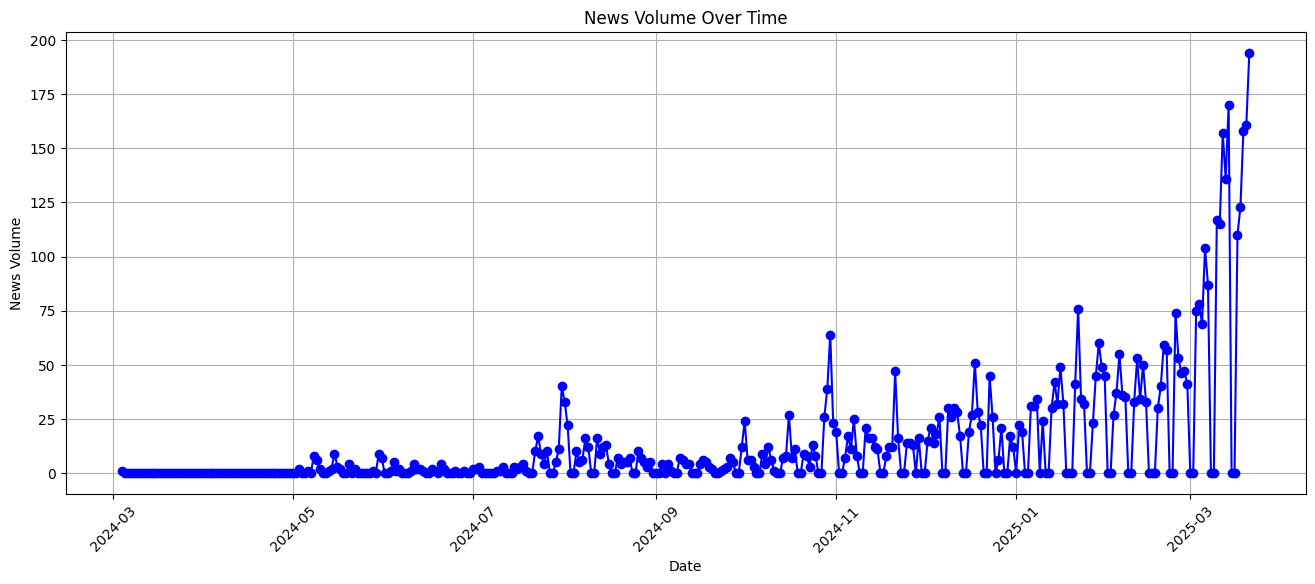

In [12]:
# Resample tweets by day to analyze volume over time
# Convert 'Date' column to DatetimeIndex and set it as index
df_vis['date'] = pd.to_datetime(df_vis['date'])  # Convert 'Date' to datetime objects
df_vis.set_index('date', inplace=True)            # Set 'Date' column as the index

# Now you can apply resample
news_volume = df_vis.resample("d").size()

# Plot
plt.figure(figsize=(16, 6))
plt.plot(news_volume.index, news_volume.values, marker="o", linestyle="-", color="b")
plt.xlabel("Date")
plt.ylabel("News Volume")
plt.title("News Volume Over Time")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [13]:
df1= df.copy()

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5100 entries, 0 to 5099
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      5100 non-null   object 
 1   ticker    5100 non-null   object 
 2   open      5100 non-null   float64
 3   high      5100 non-null   float64
 4   low       5100 non-null   float64
 5   close     5100 non-null   float64
 6   adjusted  5100 non-null   float64
 7   returns   5100 non-null   float64
 8   volume    5100 non-null   int64  
 9   quantity  5100 non-null   int64  
 10  sector    5100 non-null   object 
 11  weight    5100 non-null   float64
 12  headline  5100 non-null   object 
 13  summary   5100 non-null   object 
 14  source    5100 non-null   object 
dtypes: float64(7), int64(2), object(6)
memory usage: 597.8+ KB


In [15]:

from scipy.stats import pearsonr
df1['daily_return']= df1.groupby('ticker')['close'].pct_change()
avg_return = df1.groupby('ticker')['daily_return'].mean().reset_index()
avg_return.rename(columns={'daily_return': 'avg_return'}, inplace=True)



# Merge with weight
analysis_df = pd.merge(df1[['ticker', 'weight']], avg_return
, on='ticker', how='left')

# Calculate correlation
correlation, p_value = pearsonr(analysis_df['weight'], analysis_df['avg_return'])

print(f"Correlation between portfolio weight and average return: {correlation:.4f} (p-value: {p_value:.4f})")

Correlation between portfolio weight and average return: 0.2975 (p-value: 0.0000)


In [16]:
# Calculate volatility per ticker
volatility = df1.groupby('ticker')['daily_return'].std().reset_index()
volatility.rename(columns={'daily_return': 'volatility'}, inplace=True)

# Merge with avg_return
analysis_df = pd.merge(analysis_df, volatility, on='ticker', how='left')

# Calculate correlation
corr_vol_ret, p_value_vol_ret = pearsonr(analysis_df['volatility'], analysis_df['avg_return'])

print(f"Correlation between volatility and average return: {corr_vol_ret:.4f} (p-value: {p_value_vol_ret:.4f})")


Correlation between volatility and average return: -0.7092 (p-value: 0.0000)


In [17]:
# Total return
total_return = df1.groupby('ticker').apply(lambda x: (x['close'].iloc[-1] / x['close'].iloc[0]) - 1).reset_index()
total_return.rename(columns={0: 'total_return'}, inplace=True)

# Merge
analysis_df = pd.merge(analysis_df, total_return, on='ticker', how='left')

# Sort by total_return
analysis_df_sorted = analysis_df.sort_values('total_return', ascending=False)

# Cumulative contribution
analysis_df_sorted['cumulative_contribution'] = analysis_df_sorted['total_return'].cumsum() / analysis_df_sorted['total_return'].sum()

# Find number of assets contributing 80%
top_assets = (analysis_df_sorted['cumulative_contribution'] <= 0.8).sum()

print(f"{top_assets} assets (out of {len(analysis_df_sorted)}) contribute to 80% of total portfolio gains.")


5062 assets (out of 5100) contribute to 80% of total portfolio gains.


In [18]:
#analysis_df_sorted= analysis_df_sorted.drop('weight',axis=1)

In [19]:
# Find extreme return events in the merged data (df1)
extreme_events = df1[(df1['daily_return'] > 0.05) | (df1['daily_return'] < -0.05)]

# Merge with news (assuming 'news_data' is already merged into df1)
# This step can be skipped since you've already merged the data
# extreme_news = pd.merge(extreme_events, news_data, on=['date', 'ticker'], how='left')

# Count how many extreme events had associated news
extreme_with_news = extreme_events['headline'].notnull().sum()
total_extreme = len(extreme_events)

print(f"{extreme_with_news} out of {total_extreme} extreme return events had associated news.")


126 out of 126 extreme return events had associated news.


In [20]:
merge_df1 = pd.merge(
    df1,
    analysis_df_sorted,
    on=['ticker','weight'],
    how="left"
)

In [21]:
# Add quarter
merge_df1['quarter'] = pd.to_datetime(merge_df1['date']).dt.quarter

# Average return per quarter
quarterly_returns = merge_df1.groupby('quarter')['daily_return'].mean().reset_index()

print("\nAverage Daily Return per Quarter:")
print(quarterly_returns)

q4_avg = quarterly_returns[quarterly_returns['quarter'] == 4]['daily_return'].values[0]
other_avg = quarterly_returns[quarterly_returns['quarter'].isin([1,2,3])]['daily_return'].mean()

print(f"\nQ4 average daily return: {q4_avg:.5f}")
print(f"Average of Q1-Q3: {other_avg:.5f}")

if q4_avg > other_avg:
    print("Q4 shows elevated average returns compared to other quarters.")
else:
    print("Q4 does not show elevated average returns compared to other quarters.")



Average Daily Return per Quarter:
   quarter  daily_return
0        1     -0.000175
1        2     -0.001612
2        3      0.000216
3        4     -0.000226

Q4 average daily return: -0.00023
Average of Q1-Q3: -0.00052
Q4 shows elevated average returns compared to other quarters.


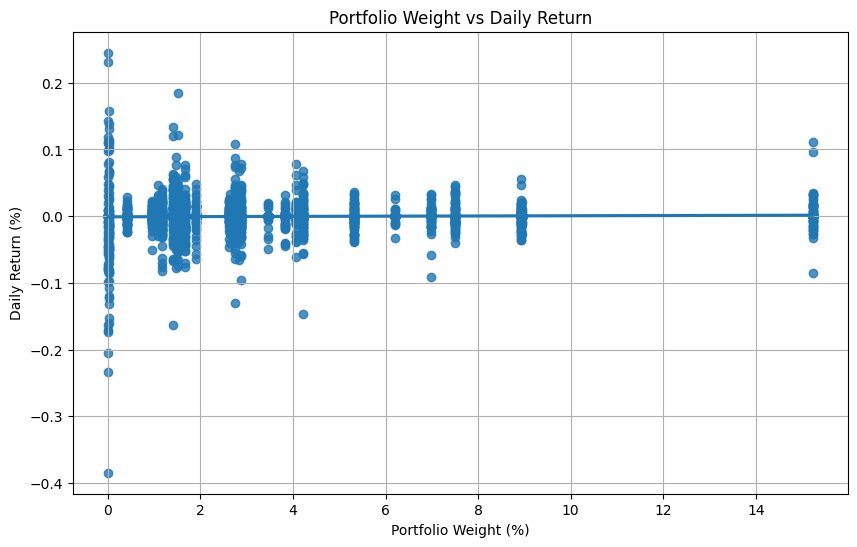

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns

# Assuming you have portfolio weights and returns calculated
plt.figure(figsize=(10,6))
sns.regplot(x='weight', y='daily_return', data=df1)
plt.title('Portfolio Weight vs Daily Return')
plt.xlabel('Portfolio Weight (%)')
plt.ylabel('Daily Return (%)')
plt.grid(True)
plt.show()


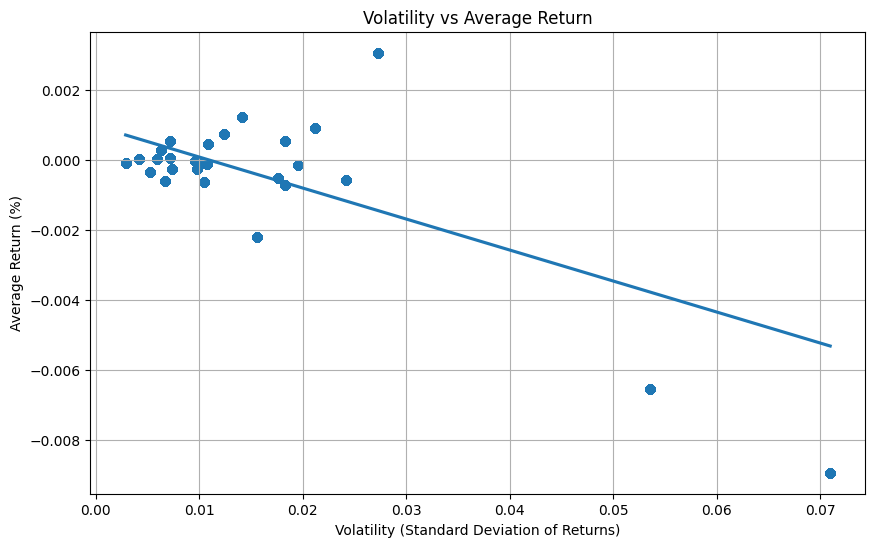

In [23]:
plt.figure(figsize=(10,6))
sns.regplot(x='volatility', y='avg_return', data=merge_df1)
plt.title('Volatility vs Average Return')
plt.xlabel('Volatility (Standard Deviation of Returns)')
plt.ylabel('Average Return (%)')
plt.grid(True)
plt.show()


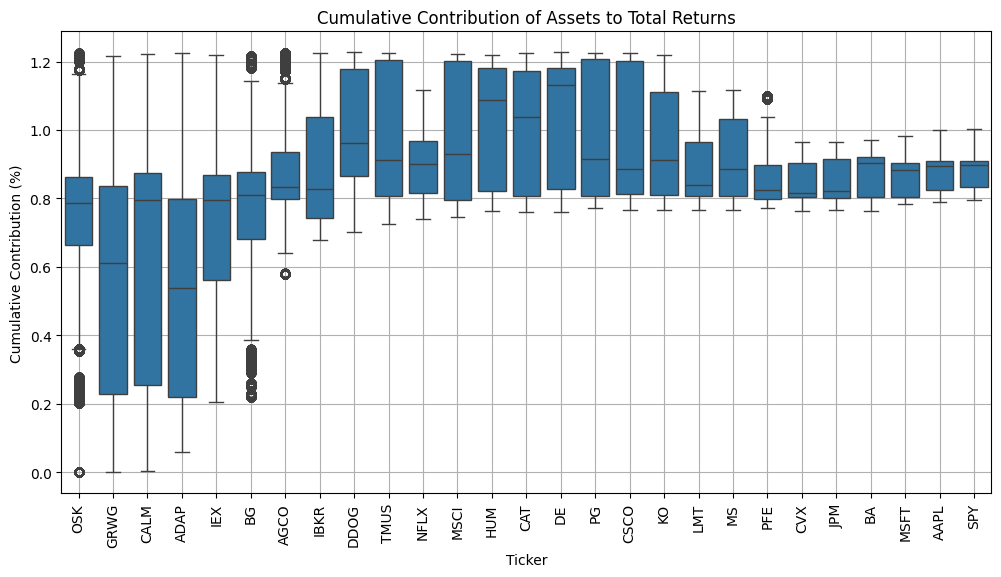

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate cumulative contribution
merge_df1['cumulative_contribution'] = merge_df1['total_return'].cumsum() / merge_df1['total_return'].sum()

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='ticker', y='cumulative_contribution', data=merge_df1)
plt.title('Cumulative Contribution of Assets to Total Returns')
plt.xticks(rotation=90)
plt.ylabel('Cumulative Contribution (%)')
plt.xlabel('Ticker')
plt.grid(True)
plt.show()


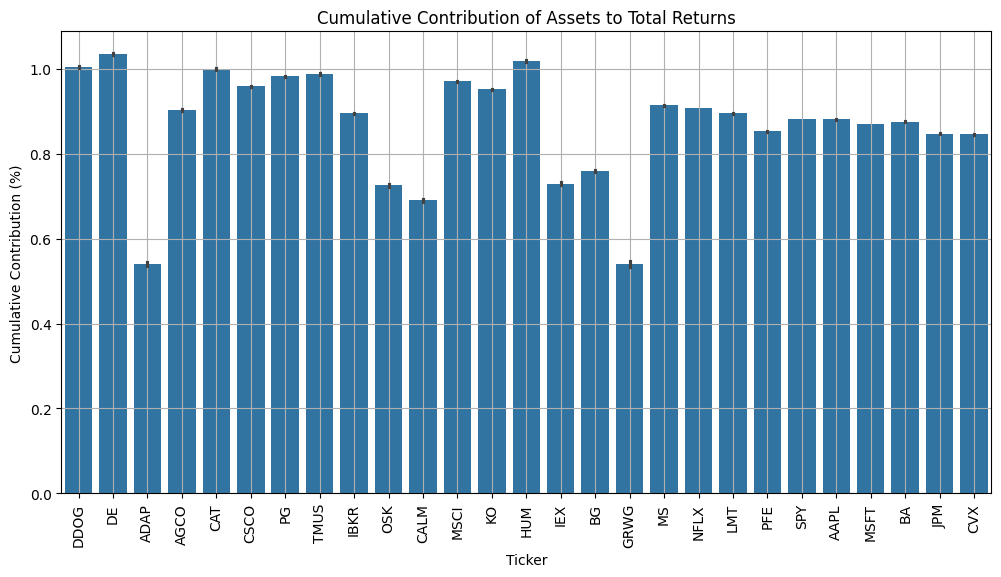

In [25]:
# Calculate cumulative contribution
merge_df1['cumulative_contribution'] = merge_df1['total_return'].cumsum() / merge_df1['total_return'].sum()

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='ticker', y='cumulative_contribution', data=merge_df1.sort_values('cumulative_contribution', ascending=False))
plt.title('Cumulative Contribution of Assets to Total Returns')
plt.xticks(rotation=90)
plt.ylabel('Cumulative Contribution (%)')
plt.xlabel('Ticker')
plt.grid(True)
plt.show()


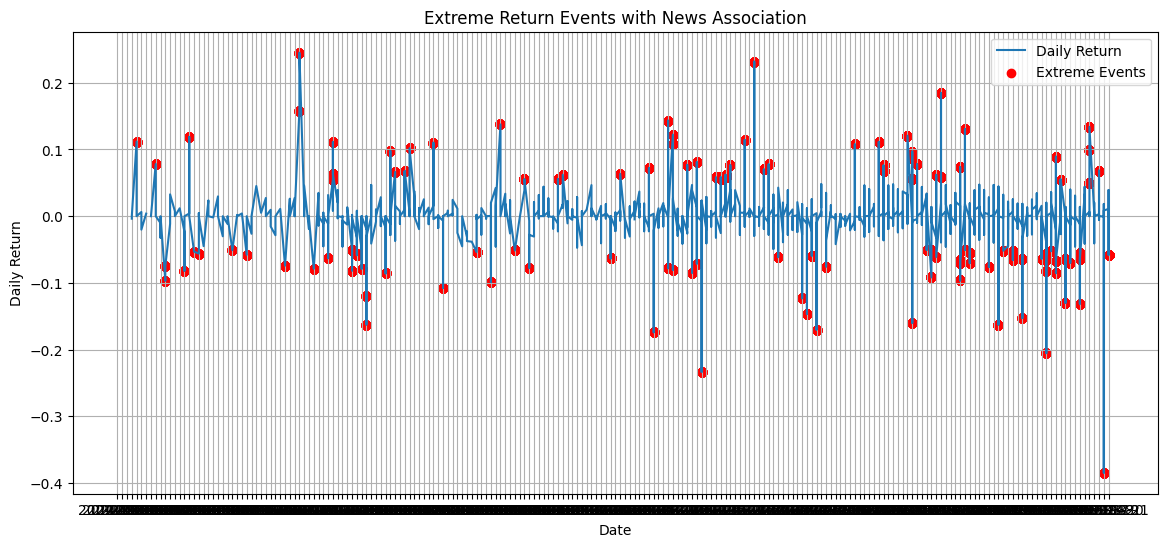

In [26]:
# Filter extreme returns
extreme_events = merge_df1[(merge_df1['daily_return'] > 0.05) | (merge_df1['daily_return'] < -0.05)]

# Plot
plt.figure(figsize=(14,6))
plt.plot(merge_df1['date'], merge_df1['daily_return'], label='Daily Return')
plt.scatter(extreme_events['date'], extreme_events['daily_return'], color='red', label='Extreme Events')
plt.title('Extreme Return Events with News Association')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()


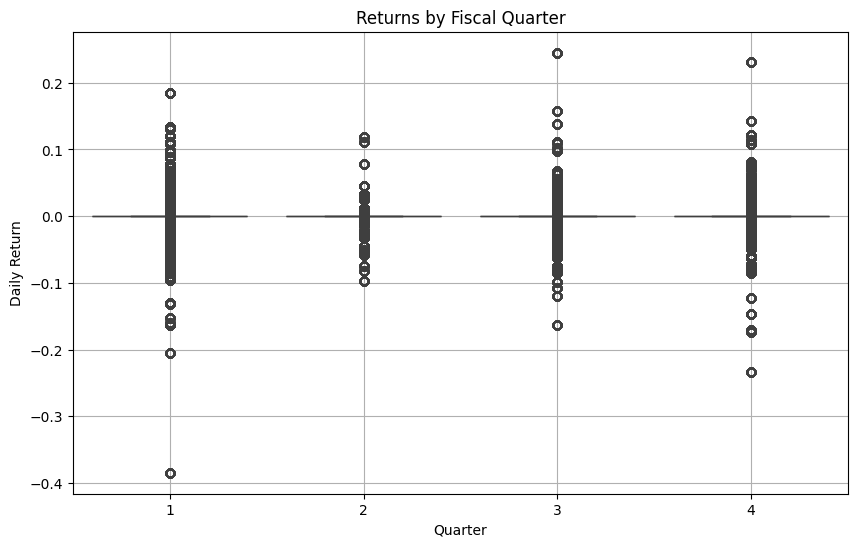

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# and 'date' is already of datetime type. If not, you can convert it:
merge_df1['date'] = pd.to_datetime(merge_df1['date'], errors='coerce')  # Convert 'date' to datetime if needed

# Create a 'quarter' column using .dt.quarter
merge_df1['quarter'] = merge_df1['date'].dt.quarter

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='quarter', y='daily_return', data=merge_df1)

# Set the title and labels
plt.title('Returns by Fiscal Quarter')
plt.xlabel('Quarter')
plt.ylabel('Daily Return')

# Display the grid and plot
plt.grid(True)
plt.show()
